<a href="https://colab.research.google.com/github/saimsheikh123/cmpe258-project/blob/main/ViT_with_Mixup.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# 1. Install/Update PyTorch and Transformers to ensure compatibility
!pip install --upgrade torch torchvision torchaudio transformers

# 2. Install the legacy Keras package (Required for ViT in Colab)
!pip install -q tf_keras

# 3. Force TensorFlow to use Legacy Keras
import os
os.environ['TF_USE_LEGACY_KERAS'] = '1'

print("✅ Libraries updated. NOW RESTART THE RUNTIME (Runtime > Restart Session).")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 899.7/899.7 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 594.3/594.3 MB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 146.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.0/88.0 MB 29.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 954.8/954.8 kB 73.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.1/193.1 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 84.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.6/63.6 MB 41.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 267.5/267.5 MB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 288.2/288.2 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.3/39.3 MB 67.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9

KeyboardInterrupt: 

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Classes: ['cane', 'cavallo', 'elefante', 'farfalla', 'gallina', 'gatto', 'mucca', 'pecora', 'ragno', 'scoiattolo']


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
TensorFlow and JAX classes are deprecated and will be removed in Transformers v5. We recommend migrating to PyTorch classes or pinning your version of Transformers.
Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFViTForImageClassification: ['pooler.dense.bias', 'pooler.dense.weight']
- This IS expected if you are initializing TFViTForImageClassification from a PyTorch model trained on another task or with another architecture (e.g. initializ


--- STAGE 1: WARM-UP ---
Epoch 1/10
573/573 [==============================] - 340s 551ms/step - loss: 0.2918 - accuracy: 0.9824 - val_loss: 0.0767 - val_accuracy: 0.9875
Epoch 2/10
573/573 [==============================] - 325s 550ms/step - loss: 0.0615 - accuracy: 0.9901 - val_loss: 0.0558 - val_accuracy: 0.9878
Epoch 3/10
573/573 [==============================] - 324s 549ms/step - loss: 0.0475 - accuracy: 0.9909 - val_loss: 0.0493 - val_accuracy: 0.9888
Epoch 4/10
573/573 [==============================] - 324s 550ms/step - loss: 0.0401 - accuracy: 0.9921 - val_loss: 0.0468 - val_accuracy: 0.9888
Epoch 5/10
573/573 [==============================] - 323s 548ms/step - loss: 0.0349 - accuracy: 0.9934 - val_loss: 0.0458 - val_accuracy: 0.9888
Epoch 6/10
573/573 [==============================] - 324s 550ms/step - loss: 0.0306 - accuracy: 0.9941 - val_loss: 0.0463 - val_accuracy: 0.9891
Epoch 7/10
573/573 [==============================] - 323s 549ms/step - loss: 0.0272 - accuracy: 0

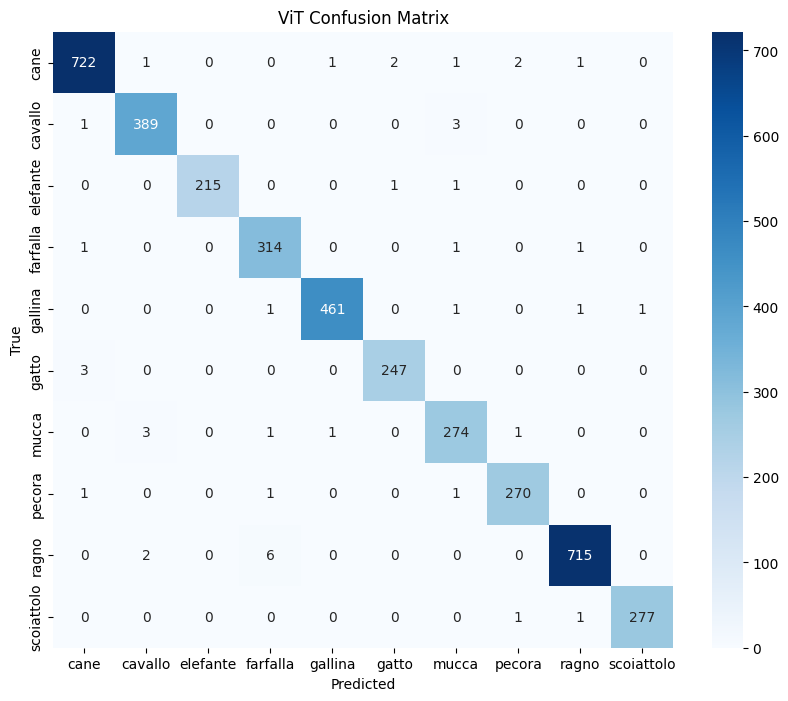

In [1]:
import os
# Force Legacy Keras again just to be safe after restart
os.environ['TF_USE_LEGACY_KERAS'] = '1'

import tensorflow as tf
import tf_keras
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.utils import class_weight
from sklearn.metrics import classification_report, f1_score, confusion_matrix
from transformers import TFAutoModelForImageClassification
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from google.colab import drive

# 1. MOUNT DRIVE
drive.mount('/content/drive')

# --- CONFIGURATION: CHECK THIS PATH ---
ZIP_PATH = '/content/drive/MyDrive/Animals-10.zip'

# 2. PREPARE DATA
if not os.path.exists('Animals-10'):
    print(f"Copying {ZIP_PATH}...")
    !cp "{ZIP_PATH}" animals-10.zip
    print("Unzipping...")
    !unzip -q animals-10.zip -d Animals-10

DATA_DIR = 'Animals-10/raw-img'
# Fallback search if folder structure is different
if not os.path.exists(DATA_DIR):
    for root, dirs, files in os.walk('Animals-10'):
        if 'cane' in dirs: DATA_DIR = root; break

class_names = sorted([d for d in os.listdir(DATA_DIR) if os.path.isdir(os.path.join(DATA_DIR, d))])
print(f"Classes: {class_names}")

image_paths = []
labels = []
class_to_index = {name: i for i, name in enumerate(class_names)}

for class_name in class_names:
    class_dir = os.path.join(DATA_DIR, class_name)
    for f in os.listdir(class_dir):
        if f.lower().endswith(('.png', '.jpg', '.jpeg')):
            image_paths.append(os.path.join(class_dir, f))
            labels.append(class_to_index[class_name])

# Stratified Split (70% Train, 15% Val, 15% Test)
X_train, X_temp, y_train, y_temp = train_test_split(image_paths, labels, test_size=0.30, random_state=42, stratify=labels)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.50, random_state=42, stratify=y_temp)

# Class Weights
class_weights_arr = class_weight.compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights = {i: w for i, w in enumerate(class_weights_arr)}

# 3. BUILD VIT DATA PIPELINE
def process_image(image_path, label):
    img = tf.io.read_file(image_path)
    img = tf.io.decode_jpeg(img, channels=3)
    img = tf.image.resize(img, (224, 224))
    img = (img / 127.5) - 1.0 # ViT Normalization [-1, 1]
    img = tf.transpose(img, [2, 0, 1]) # Channels First
    return img, label

def build_ds(paths, labels, train=False):
    ds = tf.data.Dataset.from_tensor_slices((paths, labels))
    ds = ds.map(process_image, num_parallel_calls=tf.data.AUTOTUNE)
    if train: ds = ds.shuffle(len(paths))
    return ds.batch(32).prefetch(tf.data.AUTOTUNE)

train_ds = build_ds(X_train, y_train, train=True)
val_ds = build_ds(X_val, y_val)
test_ds = build_ds(X_test, y_test)

# 4. LOAD & TRAIN MODEL
MODEL_NAME = "google/vit-base-patch16-224-in21k"
model = TFAutoModelForImageClassification.from_pretrained(
    MODEL_NAME, num_labels=10, from_pt=True,
    id2label={i: c for i, c in enumerate(class_names)},
    label2id={c: i for i, c in enumerate(class_names)}
)

# Stage 1: Warmup
print("\n--- STAGE 1: WARM-UP ---")
model.vit.trainable = False
model.compile(optimizer=Adam(1e-3), metrics=['accuracy'])
model.fit(train_ds, validation_data=val_ds, epochs=10, class_weight=class_weights)

# Stage 2: Fine-Tuning (Saves to Drive)
print("\n--- STAGE 2: FINE-TUNING ---")
model.vit.trainable = True
model.compile(optimizer=Adam(1e-5), metrics=['accuracy'])

# SAVE TO DRIVE SO YOU DON'T LOSE IT
checkpoint_path = '/content/drive/MyDrive/vit_best_final.h5'

callbacks = [
    EarlyStopping(patience=3, restore_best_weights=True),
    ModelCheckpoint(checkpoint_path, save_best_only=True, save_weights_only=True)
]

history = model.fit(train_ds, validation_data=val_ds, epochs=20, class_weight=class_weights, callbacks=callbacks)

# 5. EVALUATION
print("\n--- FINAL RESULTS ---")
logits = model.predict(test_ds).logits
y_pred = np.argmax(logits, axis=1)

print(classification_report(y_test, y_pred, target_names=class_names))
print(f"Weighted F1: {f1_score(y_test, y_pred, average='weighted'):.4f}")

# Plot Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('ViT Confusion Matrix')
plt.show()